### 1. Refresher: Basic SQL Operations in Spark SQL
- **Task 1**: Review your understanding of basic SQL by running simple queries on datasets in Spark SQL.


In [44]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

data = [
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3250, 2),
]
columns = ["Name", "Age", "Gender", "Salary", "DeptId"]
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView("employees")

spark.sql("SELECT * FROM employees").show()
spark.sql("SELECT Name, Age FROM employees WHERE Salary > 3000").show()
spark.sql("SELECT AVG(Salary) FROM employees").show()

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
| Andy| 34|     F|  4700|     2|
| John| 28|     M|  4200|     1|
| Jane| 23|     F|  3250|     2|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
|Andy| 34|
|John| 28|
|Jane| 23|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3658.3333333333335|
+------------------+



### 2. Advanced Queries for Data Analysis
Use more complex queries, involving grouping, filtering, and subqueries.
- **Task 2**: Create an SQL query that calculates total salary based on gender and age.


In [43]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

data = [
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3250, 2),
]
columns = ["Name", "Age", "Gender", "Salary", "DeptId"]
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView("employees")

spark.sql("""
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
""").show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       3250| 23|
|     F|       4100| 28|
|     M|       4200| 28|
|     M|       3000| 34|
|     F|       4700| 34|
+------+-----------+---+



- **Additional Task 2**: 
1. Find the average salary per department.
2. Find employees who earn above-average salaries for their gender.
3. Rank employees by salary within their department.


In [45]:
# https://www.w3resource.com/sql-exercises/subqueries/sql-subqueries-inventory-exercise-12.php
# https://medium.com/@serasiyasavan14/rank-functions-in-sql-rank-dense-rank-row-number-ntile-n-6b0d9f8521dc

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

data = [
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3300, 2),
]
columns = ["Name", "Age", "Gender", "Salary", "DeptId"]
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView("employees")

print("1. Employees average salary in each department:")
spark.sql("""
SELECT AVG(Salary) AS AverageSalary, DeptId
FROM employees
GROUP BY DeptId;
""").show()

print("2. Employees with above average salary in each gender:")
spark.sql("""
SELECT *
FROM employees a
WHERE Salary > (
    SELECT AVG(b.Salary)
    FROM employees b
    WHERE a.Gender = b.Gender
);
""").show()

print("3. Employees rank based on the salary in each department:")
spark.sql("""
SELECT Name, Age, Gender, Salary, DeptId, DENSE_RANK() OVER(PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
""").show()

1. Employees average salary in each department:
+------------------+------+
|     AverageSalary|DeptId|
+------------------+------+
|            3300.0|     1|
|4033.3333333333335|     2|
+------------------+------+

2. Employees with above average salary in each gender:
+----+---+------+------+------+
|Name|Age|Gender|Salary|DeptId|
+----+---+------+------+------+
|Anna| 28|     F|  4100|     2|
|Andy| 34|     F|  4700|     2|
|John| 28|     M|  4200|     1|
+----+---+------+------+------+

3. Employees rank based on the salary in each department:
+-----+---+------+------+------+----+
| Name|Age|Gender|Salary|DeptId|Rank|
+-----+---+------+------+------+----+
| John| 28|     M|  4200|     1|   1|
|James| 34|     M|  3000|     1|   2|
|  Lee| 23|     M|  2700|     1|   3|
| Andy| 34|     F|  4700|     2|   1|
| Anna| 28|     F|  4100|     2|   2|
| Jane| 23|     F|  3300|     2|   3|
+-----+---+------+------+------+----+



### 3. Using Window Functions and Subqueries
Practice using window functions to find the highest paid employees and sort them by age group.
- **Task 3**: Apply window functions to find the top 3 employees in a given age group.


In [42]:
# https://medium.com/@manutej/mastering-sql-window-functions-guide-e6dc17eb1995
# https://stackoverflow.com/questions/35042159/alias-of-window-function-field-causing-a-not-found-error-when-used-in-having-a

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

data = [
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3250, 2),
]
columns = ["Name", "Age", "Gender", "Salary", "DeptId"]
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView("employees")

spark.sql("""
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS Rank
FROM employees;
""").show()

+-----+---+------+----+
| Name|Age|Salary|Rank|
+-----+---+------+----+
| Jane| 23|  3250|   1|
|  Lee| 23|  2700|   2|
| John| 28|  4200|   1|
| Anna| 28|  4100|   2|
| Andy| 34|  4700|   1|
|James| 34|  3000|   2|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Explore more complex queries involving multiple joins, subqueries, and window functions.
- **Task 4**: Demonstration of the use of multi-level joins and subqueries for in-depth data analysis.


In [41]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3250, 2),
], ["Name", "Age", "Gender", "Salary", "DeptId"])
departments = spark.createDataFrame([
    (1, "HR"),
    (2, "Marketing")
], ["DeptId", "DeptName"])
projects = spark.createDataFrame([
    (1, "Project A"),
    (2, "Project B")
], ["DeptId", "ProjectName"])
employees.createOrReplaceTempView("employees")
departments.createOrReplaceTempView("departments")
projects.createOrReplaceTempView("projects")

# Complex SQL query involving multiple joins and subqueries
spark.sql("""
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
""").show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
| John| 28|       HR|  Project A|
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Jane| 23|Marketing|  Project B|
| Andy| 34|Marketing|  Project B|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Exercises to strengthen the understanding of Spark SQL in distributed data analysis.
- **Task 5**: Write an SQL query to find the average salary per department and rank each employee within the department based on salary.
- **Task 6**: Use window functions to determine salary trends by age in each department.


In [34]:
# https://www.reddit.com/r/SQL/comments/puiunw/is_their_any_easy_way_to_use_sql_to_identify/

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3250, 2),
], ["Name", "Age", "Gender", "Salary", "DeptId"])
employees.createOrReplaceTempView("employees")

print("5. Write a SQL query to find the average salary per department and rank each employee within the department based on salary.")
spark.sql("""
SELECT
Name,
Age,
Gender,
Salary,
DeptId,
AVG(Salary) OVER (PARTITION BY DeptId) AS Average,
DENSE_RANK() OVER(PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees;
""").show()

print("6. Use window functions to determine salary trends by age in each department.")
spark.sql("""
SELECT
Name,
Age,
Gender,
Salary,
DeptId,
AVG(Salary) OVER (PARTITION BY Age) AS Average
FROM employees;
""").show()

5. Write a SQL query to find the average salary per department and rank each employee within the department based on salary.
+-----+---+------+------+------+------------------+----+
| Name|Age|Gender|Salary|DeptId|           Average|Rank|
+-----+---+------+------+------+------------------+----+
| John| 28|     M|  4200|     1|            3300.0|   1|
|James| 34|     M|  3000|     1|            3300.0|   2|
|  Lee| 23|     M|  2700|     1|            3300.0|   3|
| Andy| 34|     F|  4700|     2|4016.6666666666665|   1|
| Anna| 28|     F|  4100|     2|4016.6666666666665|   2|
| Jane| 23|     F|  3250|     2|4016.6666666666665|   3|
+-----+---+------+------+------+------------------+----+

6. Use window functions to determine salary trends by age in each department.
+-----+---+------+------+------+-------+
| Name|Age|Gender|Salary|DeptId|Average|
+-----+---+------+------+------+-------+
|  Lee| 23|     M|  2700|     1| 2975.0|
| Jane| 23|     F|  3250|     2| 2975.0|
| Anna| 28|     F|  4

### 5. Advanced Data Analysis and Visualization
Implementation of more advanced data analysis techniques and visualization using PySpark and matplotlib.
- **Task 7**: Perform salary trend analysis using Spark SQL and visualize the results.


Salary trend by age:
+---+-------------+
|Age|AverageSalary|
+---+-------------+
| 23|       2975.0|
| 28|       4150.0|
| 34|       3850.0|
+---+-------------+

7. Perform salary trend analysis using Spark SQL and visualize the results.


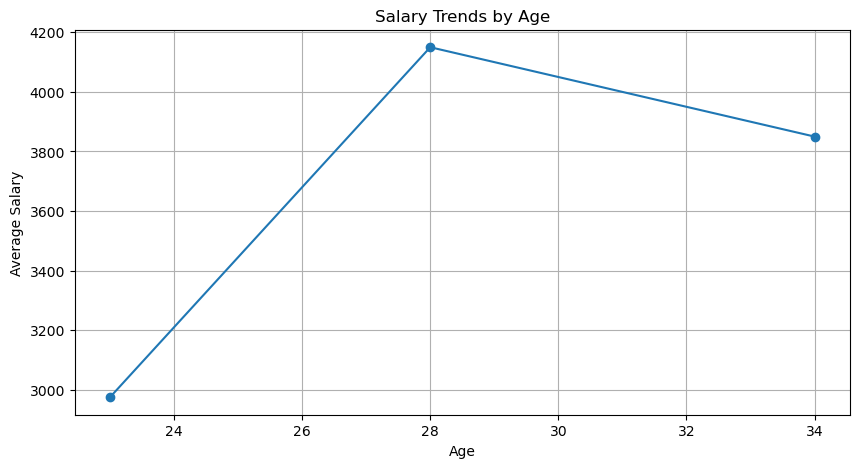

In [40]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName("Test").getOrCreate()

data = [
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3250, 2),
]
columns = ["Name", "Age", "Gender", "Salary", "DeptId"]
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView("employees")

print("Salary trend by age:")
salary_trends = spark.sql("""
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
""")
salary_trends.show()

print("7. Perform salary trend analysis using Spark SQL and visualize the results.")
salary_trends_pd = salary_trends.toPandas()

plt.figure(figsize=(10, 5))
plt.plot(salary_trends_pd["Age"], salary_trends_pd["AverageSalary"], marker="o")
plt.xlabel("Age")
plt.ylabel("Average Salary")
plt.title("Salary Trends by Age")
plt.grid(True)
plt.show()

### 6. Homework
- **Task 1**: Use Spark SQL to find total salary and number of employees per department. Create visualizations comparing departments.
- **Task 2**: Find employees with above-average salaries in each age group and visualize this data in the form of a bar graph or pie chart.
- **Task 3**: Create a larger dataset (e.g., 100+ rows) and perform in-depth analysis using SQL functions like `SUM()`, `AVG()`, `COUNT()`, and `JOIN` between tables and create interesting visualizations.


1. Use Spark SQL to find the total salary and number of employees per department. Create visualizations comparing departments.
In table form:
+------+---------+-------------+
|DeptId|SalarySum|EmployeeCount|
+------+---------+-------------+
|     1|     9900|            3|
|     2|    12050|            3|
+------+---------+-------------+

In bar graph form:


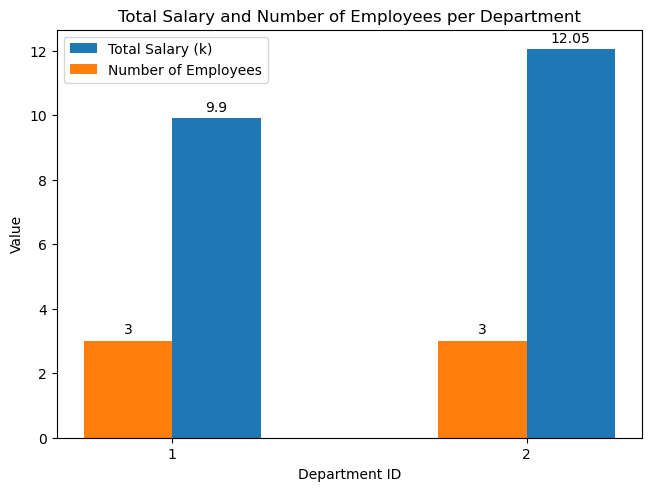

In [46]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

spark = SparkSession.builder.appName("Test").getOrCreate()

data = [
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3250, 2),
]
columns = ["Name", "Age", "Gender", "Salary", "DeptId"]
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView("employees")

print("1. Use Spark SQL to find the total salary and number of employees per department. Create visualizations comparing departments.")
total_salary = spark.sql("""
SELECT DeptId, SUM(Salary) AS SalarySum, COUNT(*) AS EmployeeCount
FROM employees
GROUP BY DeptId;
""")

print("In table form:")
total_salary.show()

print("In bar graph form:")
total_salary_pandas = total_salary.toPandas()
total_salary_pandas["SalarySum"] = total_salary_pandas["SalarySum"] / 1000 
fig, ax = plt.subplots(layout="constrained")

ax.bar_label(ax.bar(total_salary_pandas["DeptId"] + 0.125, total_salary_pandas["SalarySum"], width=0.25, label="Total Salary (k)"), padding=3)
ax.bar_label(ax.bar(total_salary_pandas["DeptId"] - 0.125, total_salary_pandas["EmployeeCount"], width=0.25, label="Number of Employees"), padding=3)
ax.set_xlabel("Department ID")
ax.set_ylabel("Value")
ax.set_title("Total Salary and Number of Employees per Department")
ax.set_xticks(total_salary_pandas["DeptId"])
ax.legend()
plt.show()

2. Find employees with above-average salaries in each age group and visualize this data in the form of a bar graph or pie chart.
In table form:
+----+---+------+------+------+
|Name|Age|Gender|Salary|DeptId|
+----+---+------+------+------+
|Andy| 34|     F|  4700|     2|
|John| 28|     M|  4200|     1|
|Jane| 23|     F|  3250|     2|
+----+---+------+------+------+

In bar graph form:


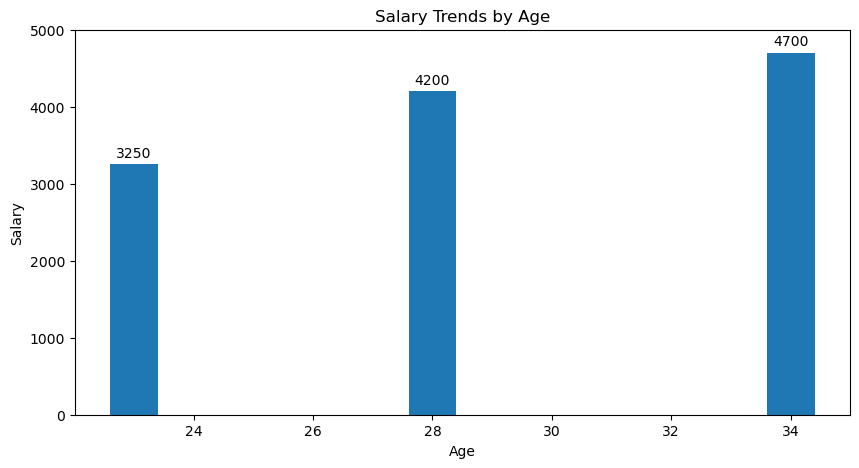

In [48]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
spark = SparkSession.builder.appName("Test").getOrCreate()

data = [
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1),
    ("Andy", 34, "F", 4700, 2),
    ("John", 28, "M", 4200, 1),
    ("Jane", 23, "F", 3250, 2),
]
columns = ["Name", "Age", "Gender", "Salary", "DeptId"]
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView("employees")

print("2. Find employees with above-average salaries in each age group and visualize this data in the form of a bar graph or pie chart.")
above_average = spark.sql("""
SELECT *
FROM employees a
WHERE Salary > (
    SELECT AVG(b.Salary)
    FROM employees b
    WHERE a.Age = b.Age
);
""")

print("In table form:")
above_average.show()

print("In bar graph form:")
above_average_pandas = above_average.toPandas()

plt.figure(figsize=(10, 5))
plt.bar_label(plt.bar(above_average_pandas["Age"], above_average_pandas["Salary"]), padding=3)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.ylim(0, 5000)
plt.title("Salary Trends by Age")
plt.show()

Create a larger dataset (e.g., 100+ rows) and perform in-depth analysis using SQL functions like SUM(), AVG(), COUNT(), and JOINs between tables and visualize it.

Foods:
+---+-------+
| ID|   Food|
+---+-------+
|  1|  Wheat|
|  2| Barley|
|  3|   Corn|
|  4|Soybean|
|  5| Potato|
|  6|   Rice|
+---+-------+

Regions:
+---+-------+
| ID| Region|
+---+-------+
|  1|America|
|  2|   Asia|
|  3| Africa|
|  4| Europe|
|  5|Oceania|
+---+-------+

Top 20 food production in each region from 2000 to 2025:
+--------+-------+-----+---------------+------------------+
|FoodType| Region|Count|TotalProduction| AverageProduction|
+--------+-------+-----+---------------+------------------+
|  Barley| Europe|   12|        3864769| 322064.0833333333|
|    Rice|Oceania|   14|        3864531| 276037.9285714286|
|    Corn|Oceania|   13|        3571398|274722.92307692306|
|   Wheat|America|   11|        3054587| 277689.7272727273|
|  Potato|   Asia|   10|        2767916|          276791.6|
| Soybean| Euro

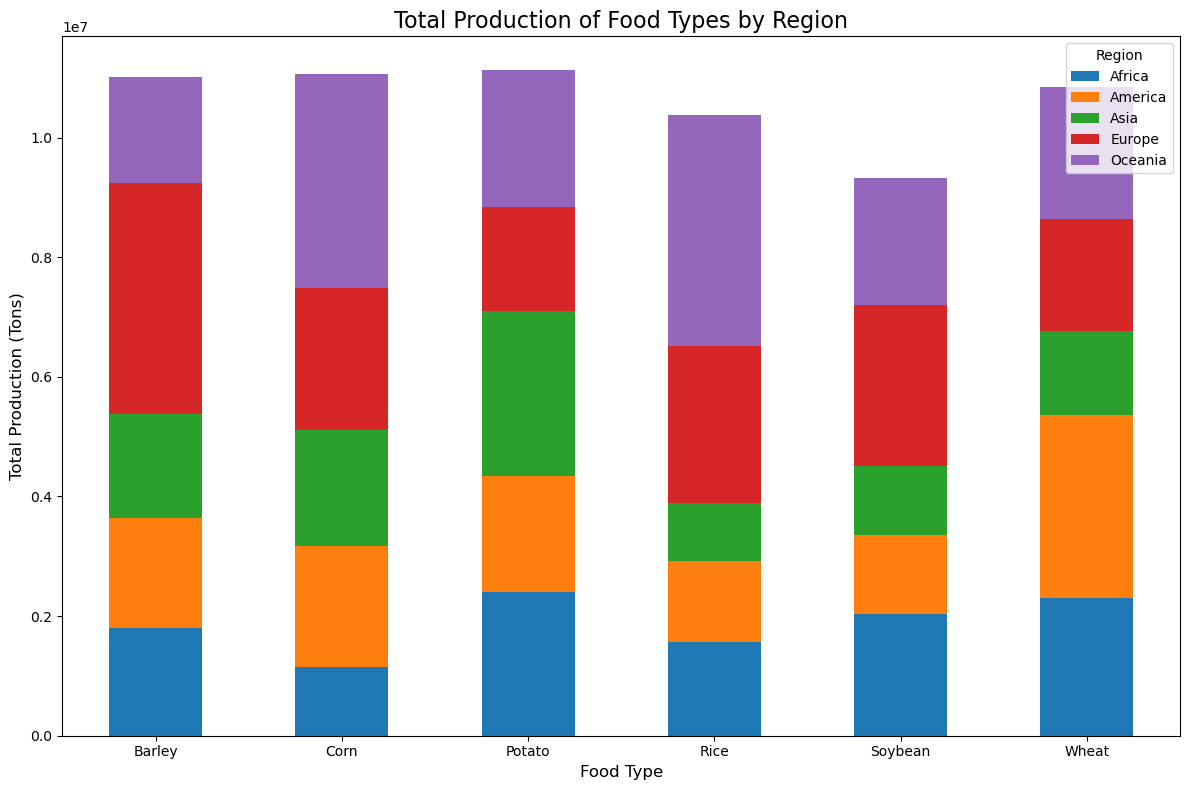

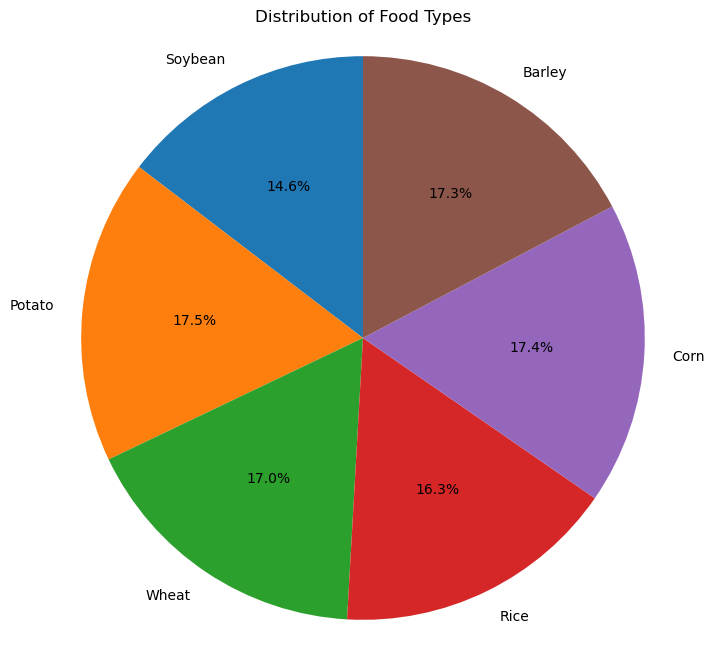

In [54]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import random

spark = SparkSession.builder.appName("Test").getOrCreate()

food_types = ["Wheat", "Barley", "Corn", "Soybean", "Potato", "Rice"]
regions = ["America", "Asia", "Africa", "Europe", "Oceania"]

data = []

print("Create a larger dataset (e.g., 100+ rows) and perform in-depth analysis using SQL functions like SUM(), AVG(), COUNT(), and JOINs between tables and visualize it.")

random.seed(1) # Ensure that the data will be the same everytime the script runs

for _ in range(500):
    data.append((random.randint(2000, 2025), random.randint(1, 10), random.randint(1, 6), random.randint(10000, 500000)))

columns = ["Year", "FoodID", "RegionID", "ProductionTons"]
df = spark.createDataFrame(data, columns)
df.createOrReplaceTempView("productions")

foods_df = spark.createDataFrame(
    [(i + 1, food_types[i]) for i in range(len(food_types))],
    ["ID", "Food"]
)
foods_df.createOrReplaceTempView("foods")

regions_df = spark.createDataFrame(
    [(i + 1, regions[i]) for i in range(len(regions))],
    ["ID", "Region"]
)
regions_df.createOrReplaceTempView("regions")

print("\nFoods:")
foods_df.show()

print("Regions:")
regions_df.show()

print("Top 20 food production in each region from 2000 to 2025:")
query_result = spark.sql("""
SELECT
f.Food AS FoodType,
r.Region AS Region,
COUNT(pd.Year) AS Count,
SUM(pd.ProductionTons) AS TotalProduction,
AVG(pd.ProductionTons) AS AverageProduction
FROM productions pd
JOIN foods f ON pd.FoodID = f.ID
JOIN regions r ON pd.RegionID = r.ID
GROUP BY f.Food, r.Region
ORDER BY TotalProduction DESC;
""")
query_result.createOrReplaceTempView("top20")
query_result.show()

query_result_pd = query_result.toPandas()

pivot_data = query_result_pd.pivot_table(
    values="TotalProduction", 
    index="FoodType", 
    columns="Region", 
    aggfunc="sum", 
    fill_value=0
)

# Bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Total Production of Food Types by Region", fontsize=16)
plt.xlabel("Food Type", fontsize=12)
plt.ylabel("Total Production (Tons)", fontsize=12)
plt.xticks(rotation=0, ha="center")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

# Pie chart
pie_df = spark.sql("""
SELECT FoodType, SUM(TotalProduction) AS TotalProduction
FROM top20
GROUP BY FoodType;
""").toPandas()

plt.figure(figsize=(8, 8))
plt.pie(pie_df["TotalProduction"], labels=pie_df["FoodType"], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Food Types")
plt.axis("equal")
plt.show()